# Double Pendulum (Formalismo Lagrangiano)

In [1]:
%reset -f

import numpy as np
import sympy as smp

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

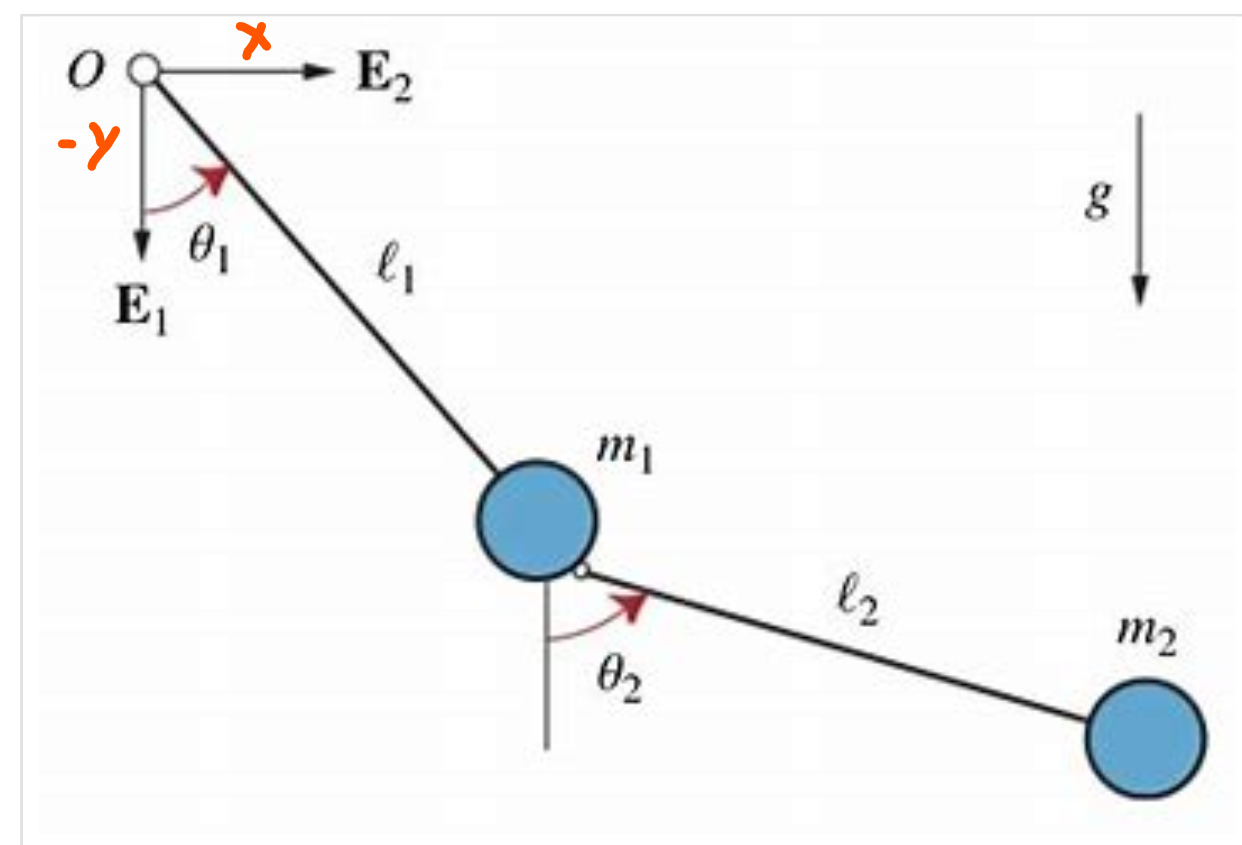

Define los simbolos apropiados en sympy

In [7]:
t, g = smp.symbols('t g', positive=True)
m1, m2 = smp.symbols(r'm_1 m_2', positive=True)
L1, L2 = smp.symbols(r'L_1 L_2', positive=True)

Definimos a $\theta_1$ y $\theta_2$ y a sus dos primeras derivadas temporales

In [3]:
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', real=True, cls=smp.Function)
theta1, theta2 = theta1(t), theta2(t)

d1_theta1 = smp.diff(theta1, t)
d2_theta1 = smp.diff(d1_theta1, t)

d1_theta2 = smp.diff(theta2, t)
d2_theta2 = smp.diff(d1_theta2, t)

Parametrizamos el movimiento de la masa: <br> <br>

En **x1**: $$x_1 = L_1\sin(\theta_1)$$ <br> <br>

En **y1**: $$y_1 = -L_1\cos(\theta_1)$$ <br> <br>

En **x2**: $$x_2 = x_1 + L_2\sin(\theta_2)$$ <br> <br>

En **y2**: $$y_2 = y_1 - L_2\cos(\theta_2)$$

In [4]:
x1 = L1 * smp.sin(theta1)
y1 = -L1 * smp.cos(theta1)

x2 = x1 + (L2 * smp.sin(theta2))
y2 = y1 - (L2 * smp.cos(theta2))

vx1 = smp.diff(x1, t)
vy1 = smp.diff(y1, t)

vx2 = smp.diff(x2, t)
vy2 = smp.diff(y2, t)

v1_squared = (vx1**2 + vy1**2).simplify(force=True)
v2_squared = (vx2**2 + vy2**2).simplify(force=True)

Transformamos las funciones simbólicas de velocidad y posición a funciones numéricas

In [5]:
x1_f = smp.lambdify((L1, theta1), x1, modules='numpy')
y1_f = smp.lambdify((L1, theta1), y1, modules='numpy')

vx1_f = smp.lambdify((L1, theta1, d1_theta1), vx1, modules='numpy')
vy1_f = smp.lambdify((L1, theta1, d1_theta1), vy1, modules='numpy')

x2_f = smp.lambdify((L1, theta1, L2, theta2), x2, modules='numpy')
y2_f = smp.lambdify((L1, theta1, L2, theta2), y2, modules='numpy')

vx2_f = smp.lambdify((L1, theta1, d1_theta1, L2, theta2, d1_theta2), vx2, modules='numpy')
vy2_f = smp.lambdify((L1, theta1, d1_theta1, L2, theta2, d1_theta2), vy2, modules='numpy')

Definimos la energía cinética y potencial. <br>
Se construye la función Lagrangiana: $L = T - U$ <br>
$L = L_1 + L_2$

In [6]:
T1 = smp.Rational(1, 2) * m1 * v1_squared
U1 = m1*g*y1
Lag1 = T1 - U1

T2 = smp.Rational(1, 2) * m2 * v2_squared
U2 = m2*g*y2
Lag2 = T2 - U2

Lag = Lag1 + Lag2
Lag

L_1**2*m_1*Derivative(\theta_1(t), t)**2/2 + L_1*g*m_1*cos(\theta_1(t)) - g*m_2*(-L_1*cos(\theta_1(t)) - L_2*cos(\theta_2(t))) + m_2*(L_1**2*Derivative(\theta_1(t), t)**2 + 2*L_1*L_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L_2**2*Derivative(\theta_2(t), t)**2)/2

Se obtienen las ecuaciones de movimiento:  <br> <br>

$$\dot{p}_{q} - \nabla_{q}L = 0$$ <br> <br>

donde:  <br> <br>

$$p_{q} = \nabla_{\dot{q}}L$$

In [7]:
gen_p1 = smp.diff(Lag, d1_theta1)
gen_f1 = smp.diff(Lag, theta1)
eq1 = (smp.diff(gen_p1, t) - gen_f1).simplify(force=True)

gen_p2 = smp.diff(Lag, d1_theta2)
gen_f2 = smp.diff(Lag, theta2)
eq2 = (smp.diff(gen_p2, t) - gen_f2).simplify(force=True)

In [8]:
eq1

L_1*(L_1*m_1*Derivative(\theta_1(t), (t, 2)) + L_1*m_2*Derivative(\theta_1(t), (t, 2)) + L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + g*m_1*sin(\theta_1(t)) + g*m_2*sin(\theta_1(t)))

In [9]:
eq2

L_2*m_2*(-L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L_2*Derivative(\theta_2(t), (t, 2)) + g*sin(\theta_2(t)))

Se despejan las ecuación de movimiento $\ddot{\theta}_1$ y $\ddot{\theta}_2$

In [10]:
d2_theta_explicit = smp.solve([eq1, eq2], [d2_theta1, d2_theta2], simplify=False, Rational=False)
d2_theta1_explicit = d2_theta_explicit[d2_theta1].simplify(force=True)
d2_theta2_explicit = d2_theta_explicit[d2_theta2].simplify(force=True)

In [11]:
d2_theta1_explicit

(-L_1*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2/2 - L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - g*m_1*sin(\theta_1(t)) - g*m_2*sin(\theta_1(t) - 2*\theta_2(t))/2 - g*m_2*sin(\theta_1(t))/2)/(L_1*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2))

In [12]:
d2_theta2_explicit

(L_1*m_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_1*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_2*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2/2 + g*m_1*sin(2*\theta_1(t) - \theta_2(t))/2 - g*m_1*sin(\theta_2(t))/2 + g*m_2*sin(2*\theta_1(t) - \theta_2(t))/2 - g*m_2*sin(\theta_2(t))/2)/(L_2*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2))

Para resolver numericamente la ecuación de segundo orden se tiene que transformar en un sistema de ecuaciones de primer orden, para eso realizamos la siguiente sustitución <br>
<ul>
  <li>$\dot{\theta}_1 = z_1$</li>
  <li>$\dot{z}_1 = \ddot{\theta}_1 = ...$</li>
  <li>$\dot{\theta}_2 = z_2$</li>
  <li>$\dot{z}_2 = \ddot{\theta}_2 = ...$</li>
</ul> 
y este sistema lo transformamos en funciones númericas

In [13]:
dtheta1_dt_f = smp.lambdify(d1_theta1, d1_theta1, modules='numpy')
dz1_dt_f = smp.lambdify((t, g, m1, L1, theta1, d1_theta1, m2, L2, theta2, d1_theta2), d2_theta1_explicit, modules='numpy')

dtheta2_dt_f = smp.lambdify(d1_theta2, d1_theta2, modules='numpy')
dz2_dt_f = smp.lambdify((t, g, m1, L1, theta1, d1_theta1, m2, L2, theta2, d1_theta2), d2_theta2_explicit, modules='numpy')

Se define un vector $\vec{S} = (\theta_1, z1, \theta_2, z2)$ y una función que toma $\vec{S}$ y $t$, y devuelve $\dot{S}$ para poder resolver el sistema de ecuaciones

In [14]:
def dSdt(t, S, g, m1, L1, m2, L2):
    theta1, z1, theta2, z2 = S
    return [
        dtheta1_dt_f(z1),
        dz1_dt_f(t, g, m1, L1, theta1, z1, m2, L2, theta2, z2),
        dtheta2_dt_f(z2),
        dz2_dt_f(t, g, m1, L1, theta1, z1, m2, L2, theta2, z2)
    ]

Definimos un arreglo de puntos en el tiempo en el cual queremos obtener la solución

In [15]:
t0 = 0
tf = 40
t_size = 4001
t = np.linspace(t0, tf, t_size)

Se definen algunas constantes (aceleración de la gravedad y masa) que se guardan en la lista args y se definen las condiciones iniciales para $\theta_{1}$, $\dot{\theta}_{1}$, $\theta_{2}$ y $\dot{\theta}_{2}$ y  que se guardan en la lista S0

In [16]:
g = 9.81
m1 = 2
L1 = 3
m2 = 2
L2 = 3
args = [g, m1, L1, m2, L2]

theta1_init = np.pi/2
d1_theta1_init = 0
theta2_init = np.pi
d1_theta2_init = 0

S0 = [theta1_init, d1_theta1_init, theta2_init, d1_theta2_init]

Se utiliza la función solve_ivp para resolver la ecuación diferencial

In [17]:
# sol = solve_ivp(dSdt, t_span=(0, 40), y0=S0, method='DOP853', t_eval=t, vectorized=False, args=args, rtol=2.220446049250313e-14, atol=1e-15)

sol = solve_ivp(dSdt, t_span=(t0, tf), y0=S0, method='DOP853', t_eval=t, args=args, rtol=1e-8, atol=1e-8)

Guardamos la solución y se grafica

In [18]:
theta1_sol = sol.y[0]
d1_theta1_sol = sol.y[1]

theta2_sol = sol.y[2]
d1_theta2_sol = sol.y[3]

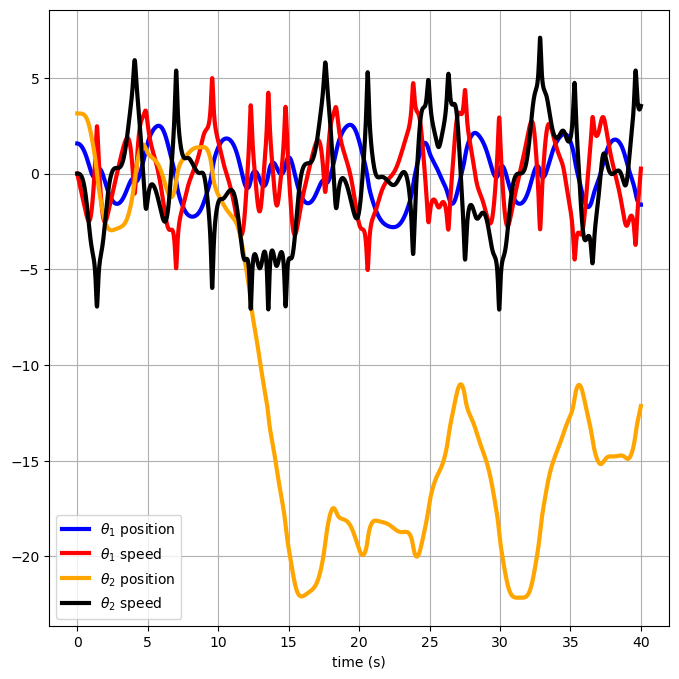

In [19]:
plt.figure(figsize=(8, 8))

plt.plot(t, theta1_sol, lw=3, c='blue', label=r'$\theta_{1}$ position')
plt.plot(t, d1_theta1_sol, lw=3, c='red', label=r'$\theta_{1}$ speed')

plt.plot(t, theta2_sol, lw=3, c='orange', label=r'$\theta_{2}$ position')
plt.plot(t, d1_theta2_sol, lw=3, c='black', label=r'$\theta_{2}$ speed')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

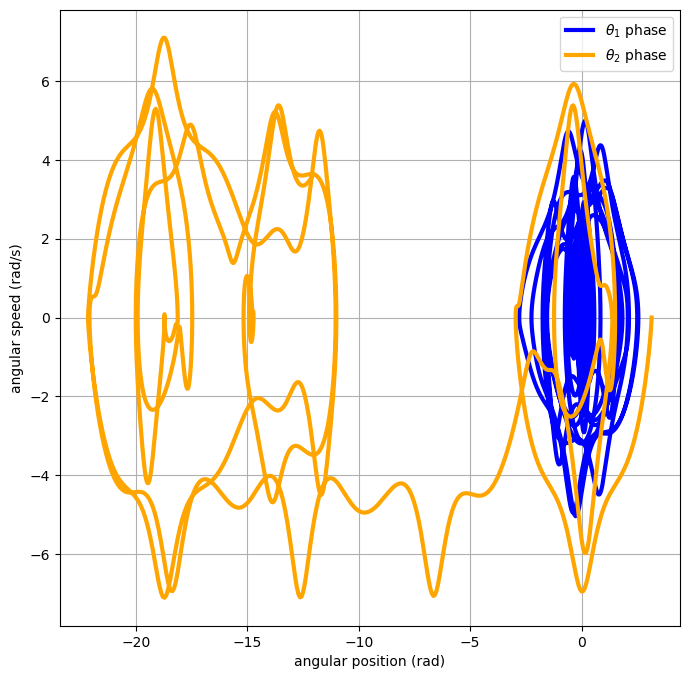

In [20]:
plt.figure(figsize=(8, 8))

plt.plot(theta1_sol, d1_theta1_sol, lw=3, c='blue', label=r'$\theta_1$ phase')
plt.plot(theta2_sol, d1_theta2_sol, lw=3, c='orange', label=r'$\theta_2$ phase')

plt.ylabel('angular speed (rad/s)')
plt.xlabel('angular position (rad)')
plt.legend()
plt.grid()
plt.show()

Creamos funciones donde ingresamos las funciones númericas de posición y velocidad anteriormente transformadas

In [21]:
def eval_positions(L1, theta1, L2, theta2):
    return [
        x1_f(L1, theta1),
        y1_f(L1, theta1),
        x2_f(L1, theta1, L2, theta2),
        y2_f(L1, theta1, L2, theta2)
    ]

def eval_velocities(L1, theta1, d1_theta1, L2, theta2, d1_theta2):
    return [
        vx1_f(L1, theta1, d1_theta1),
        vy1_f(L1, theta1, d1_theta1),
        vx2_f(L1, theta1, d1_theta1, L2, theta2, d1_theta2),
        vy2_f(L1, theta1, d1_theta1, L2, theta2, d1_theta2)
    ]

Calculamos las posiciones y velocidades en $x$ e $y$

In [22]:
x1, y1, x2, y2 = eval_positions(L1, theta1_sol, L2, theta2_sol)
vx1, vy1, vx2, vy2 = eval_velocities(L1, theta1_sol, d1_theta1_sol, L2, theta2_sol, d1_theta2_sol)

In [23]:
v1_squared = vx1**2 + vy1**2
v2_squared = vx2**2 + vy2**2

K1 = (1/2) * m1 * v1_squared
K2 = (1/2) * m2 * v2_squared

P1 = m1 * g * y1
P2 = m2 * g * y2

H1 = K1 + P1
H2 = K2 + P2

H = H1 + H2

In [24]:
print('Energy =', H[0], 'J')
print('Max Energy Variation =', np.abs(np.max(np.abs(H)) - H[0]), 'J')

Energy = 58.85999999999999 J
Max Energy Variation = 7.919175718029692e-05 J


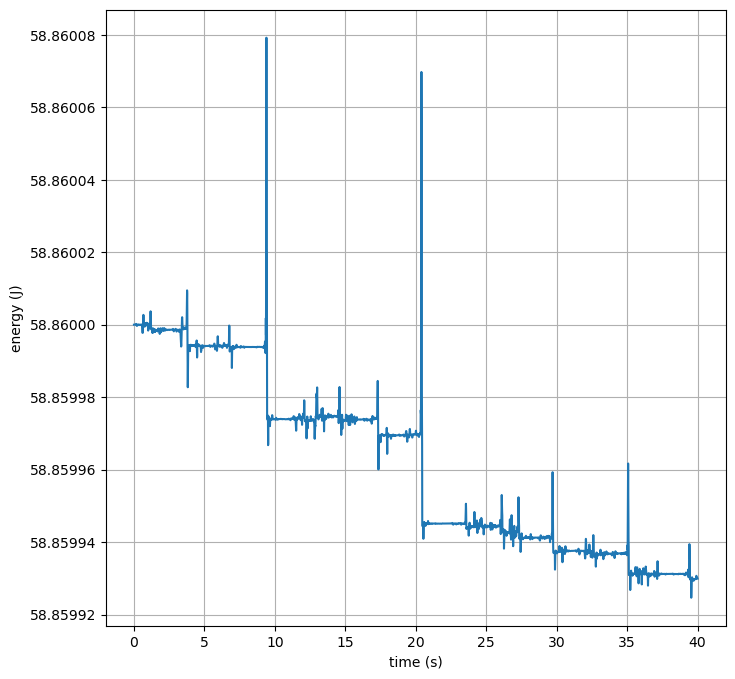

In [25]:
plt.figure(figsize=(8, 8))

plt.plot(t, H)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.xlabel('time (s)')
plt.ylabel('energy (J)')
plt.grid()
plt.show()

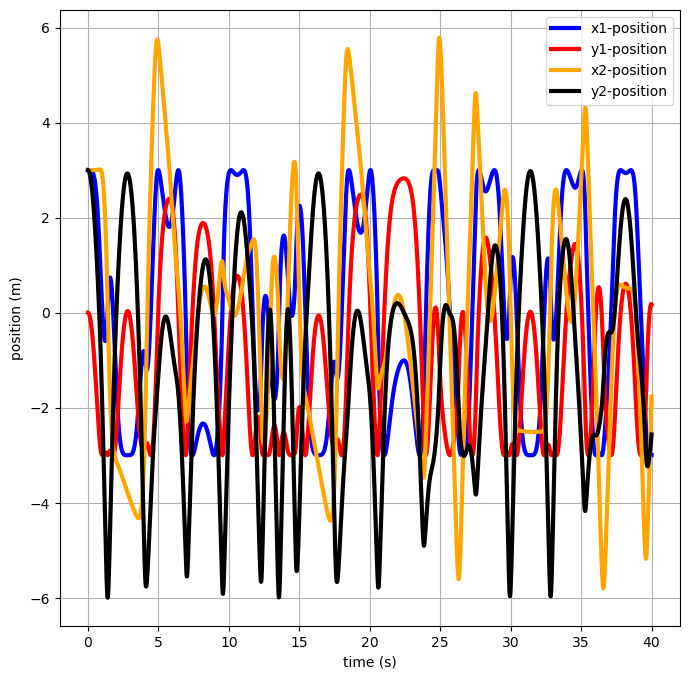

In [26]:
plt.figure(figsize=(8, 8))

plt.plot(t, x1, lw=3, c='blue', label='x1-position')
plt.plot(t, y1, lw=3, c='red', label='y1-position')

plt.plot(t, x2, lw=3, c='orange', label='x2-position')
plt.plot(t, y2, lw=3, c='black', label='y2-position')

plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.grid()
plt.show()

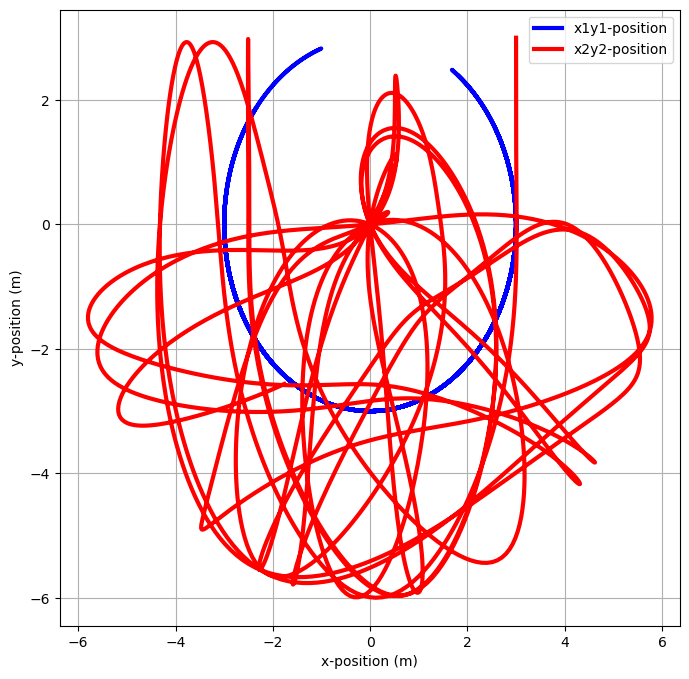

In [27]:
plt.figure(figsize=(8, 8))

plt.plot(x1, y1, lw=3, c='blue', label='x1y1-position')
plt.plot(x2, y2, lw=3, c='red', label='x2y2-position')

plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.legend()
plt.grid()
plt.show()

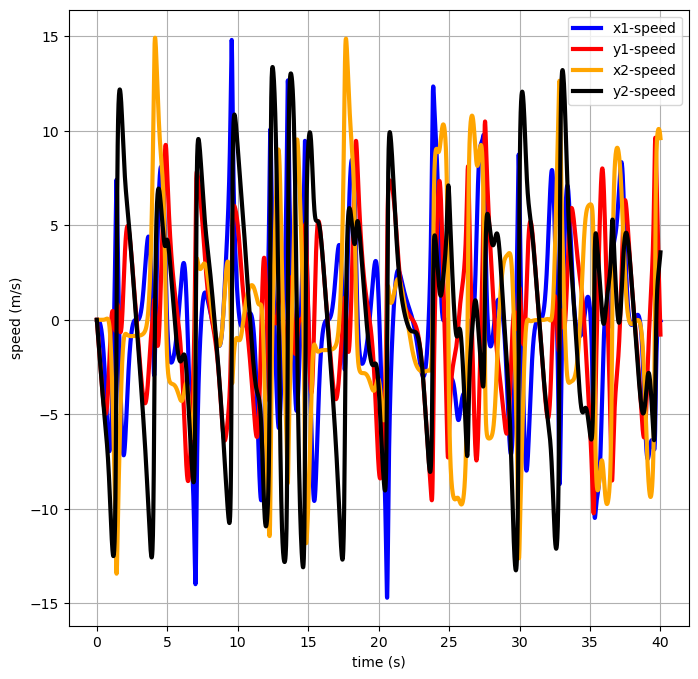

In [28]:
plt.figure(figsize=(8, 8))

plt.plot(t, vx1, lw=3, c='blue', label='x1-speed')
plt.plot(t, vy1, lw=3, c='red', label='y1-speed')

plt.plot(t, vx2, lw=3, c='orange', label='x2-speed')
plt.plot(t, vy2, lw=3, c='black', label='y2-speed')

plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.legend()
plt.grid()
plt.show()

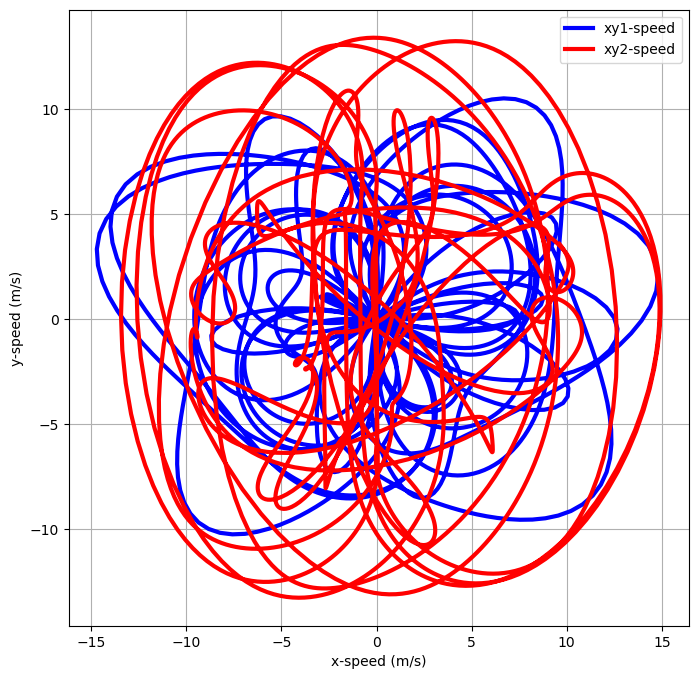

In [29]:
plt.figure(figsize=(8, 8))

plt.plot(vx1, vy1, lw=3, c='blue', label='xy1-speed')
plt.plot(vx2, vy2, lw=3, c='red', label='xy2-speed')

plt.xlabel('x-speed (m/s)')
plt.ylabel('y-speed (m/s)')
plt.legend()
plt.grid()
plt.show()

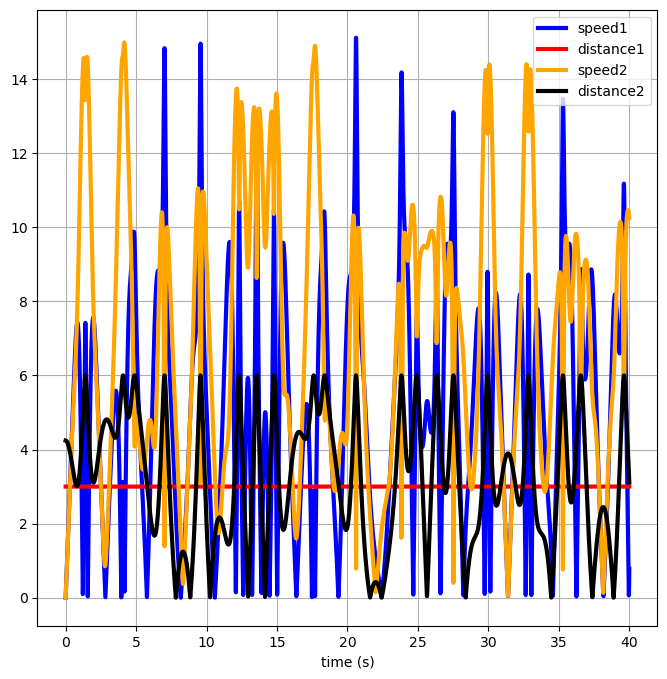

In [30]:
plt.figure(figsize=(8, 8))

plt.plot(t, np.sqrt(vx1**2 + vy1**2), lw=3, c='blue', label='speed1')
plt.plot(t, np.sqrt(x1**2 + y1**2), lw=3, c='red', label='distance1')

plt.plot(t, np.sqrt(vx2**2 + vy2**2), lw=3, c='orange', label='speed2')
plt.plot(t, np.sqrt(x2**2 + y2**2), lw=3, c='black', label='distance2')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

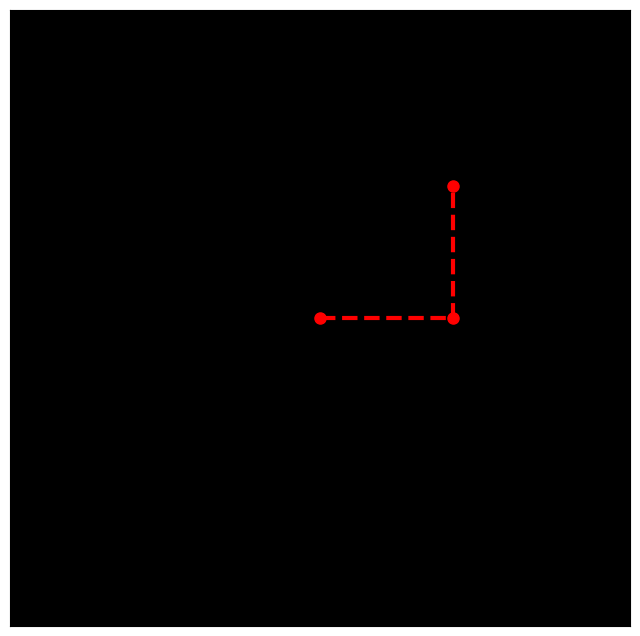

In [31]:
fps = len(t[t<1])
frames = t_size - 1
interval = (tf/frames)*1000

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)

ax.set_xlim(-L1-L2-0.5, L1+L2+0.5)
ax.set_ylim(-L1-L2-0.5, L1+L2+0.5)

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval)
ani.save('Animations/double_pendulum.mp4', writer='ffmpeg', fps=fps)